# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

例如有下面一张图片：

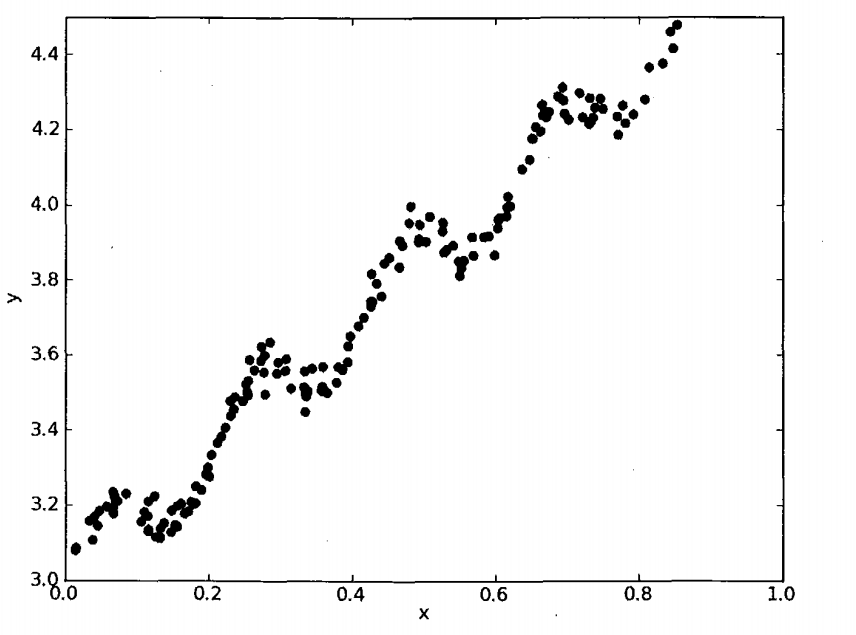

求回归曲线，得到：

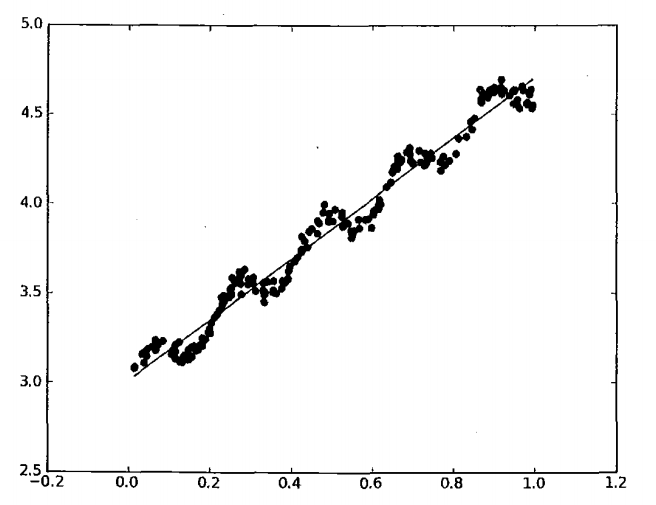

### 2、实例

导包

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

#### 1. 简单演示

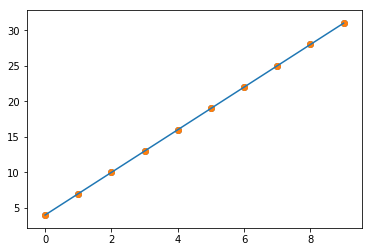

In [6]:
# 在坐标系上 画出一些点 让机器学习模型通过线性回归 去划线来拟合这些点
x = np.arange(0,10,1)  # 从0到10 每隔一个取一个
x

y = 3*x + 4
y

plt.scatter(x,y)

# 使用机器学习模型来拟合这些点
from sklearn.linear_model import LinearRegression
# 获取模型 训练模型
lr = LinearRegression()
# 训练（注意传入数据的形状）
lr.fit(x.reshape(-1,1),y)

# 获取 估算出来的 斜率 和 截距
lr.coef_  # coefficient 系数 斜率 权重
lr.intercept_  # 截距 偏差
# 绘图验证
w = lr.coef_[0]
b = lr.intercept_ 
y_ = w*x+ b
plt.plot(x,y_)
plt.scatter(x,y)

In [ ]:
# 因为大家提前知道了斜率和截距 可能觉得没什么 这回我们随机产生一个

In [ ]:
np.random.random()  # 随机产生一个0-1的数

In [11]:
w = np.random.random()*10
b = np.random.random()*5  # 先不给大家看w和b的值

In [ ]:
x = np.arange(0,10,1)  # x还是0到10
x

y = w*x + b
y

plt.scatter(x,y)

In [ ]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
print(lr.coef_,lr.intercept_)  # 估测的斜率和截距

In [ ]:
y_ = lr.coef_[0]*x + lr.intercept_
plt.scatter(x,y)
plt.plot(x,y_)

In [ ]:
print(w,b)  # 真实的斜率和截距

#### 2. 糖尿病严重程度预测

获取糖尿病数据

In [47]:
# 糖尿病的数据集 是sklearn的datasets里面自带的
import sklearn.datasets as datasets
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [54]:
print(diabetes.DESCR)  # 描述

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [55]:
data = diabetes.data  # 数据
data
feature_names = diabetes.feature_names  # 特征名
target = diabetes.target  # 目标值

In [53]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [52]:
DataFrame(data,columns=feature_names)  # 年龄 性别 身高体重指数（体重/身高**2） 血压 后面六个是血清的一些指数

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


抽取训练数据和预测数据

创建数学模型

In [56]:
lr = LinearRegression()

第一步：训练

In [57]:
lr.fit(data,target)  # 传入各个样本的特征 和 结果值

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
w = lr.coef_  # 斜率

In [74]:
b = lr.intercept_  # 截距

In [ ]:
# y = w*x + b
# y = w1*x1 + w2*x2 + w3*x3 + ... + w10*x10 + b

第二步：预测

In [94]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [77]:
w

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [78]:
data[index]

array([ 0.11072668,  0.05068012, -0.03315126, -0.02288496, -0.00432087,
        0.02029337, -0.06180903,  0.07120998,  0.01556684,  0.04448548])

In [93]:
# 随机产生一个索引 按照索引从原来的样本中抽取一个数据
# 看带入模型后算出的结果 和 真实值的偏差
index = np.random.randint(0,442,size=1)[0]
index
data[index]
target[index]
# 根据 机器学习模型 计算出来的 截距和斜率 还有 随机抽取的那个样本的特征值 去计算结果
y_ = np.dot(w,data[index]) + b
# 看看预测出来的结果和真实结果 差别大不大
y_
print('真实的结果是：',target[index])
print('回归的结果是：',y_)

真实的结果是： 281.0
回归的结果是： 235.18090808171556


In [96]:
data[index]

array([ 0.05987114, -0.04464164, -0.02129532,  0.0872869 ,  0.04521344,
        0.03156671, -0.04708248,  0.07120998,  0.07912108,  0.13561183])

In [ ]:
# 可以直接把x传入lr.predict 即可返回y_

In [97]:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample.
lr.predict(data[index].reshape(1,-1))

array([235.18090808])

第三步：绘制图形（研究某一特征和糖尿病严重程度的关系）

In [98]:
w  # 索引为2的这个特征 权重比较大

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [99]:
feature_names  # 索引为2的这个特征 是 bmi

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# 接下来 单独 研究 bmi和糖尿病严重程度的关系 并 绘图

In [105]:
# 把 bmi拿出来
bmi_data = data[:,2]
# 机器学习模型 需要的都是 二维的数据
# 每一行是一个样本 每一列是一个特征
# bmi_data是很多样本的 bmi这一个特征 所以要变形
bmi_data = bmi_data.reshape(-1,1)

In [107]:
X_test = bmi_data  # 特征

In [108]:
y_test = target  # 目标值

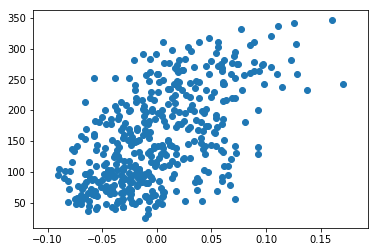

In [109]:
plt.scatter(X_test,y_test)

In [110]:
lr = LinearRegression()

In [111]:
lr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
w = lr.coef_

In [115]:
b = lr.intercept_

In [117]:
w

array([949.43526038])

In [119]:
y_ = w*X_test + b
y_

array([[210.71003806],
       [103.26219543],
       [194.33703347],
       [141.12476855],
       [117.58857445],
       [113.4953233 ],
       [107.35544658],
       [150.33458363],
       [210.71003806],
       [189.22046954],
       [ 72.56281182],
       [168.7542138 ],
       [124.75176395],
       [150.33458363],
       [127.82170232],
       [134.98489182],
       [192.2904079 ],
       [163.63764986],
       [142.14808133],
       [134.98489182],
       [ 98.14563149],
       [130.89164068],
       [148.28795806],
       [209.68672528],
       [186.15053118],
       [140.10145576],
       [ 78.70268854],
       [208.66341249],
       [131.91495346],
       [146.24133248],
       [194.33703347],
       [ 89.9591292 ],
       [271.0854925 ],
       [104.28550821],
       [ 92.00575477],
       [122.70513838],
       [173.87077773],
       [162.61433707],
       [219.91985315],
       [165.68427544],
       [144.19470691],
       [ 87.91250362],
       [142.14808133],
       [129

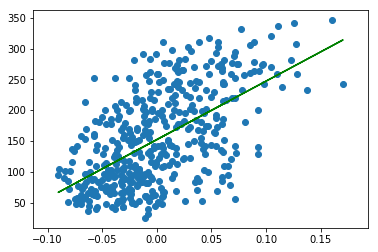

In [123]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_,color='green')

## 二、岭回归

In [ ]:
# 线性回归可以求解 各个特征的权重
# 但是如果特征比样本还多 这个时候用线性回归就无法求解了

y1 = w1*x1 + w2*x2 + w3*x3
y2 = w1*x1 + w2*x2 + w3*x3
y3 = w1*x1 + w2*x2 + w3*x3

# 一般来说 三元一次方程组 有三个方程就可以有解了
# 但是如果是像下面这样的三个方程 则无解（解不唯一 有很多解）

w1*1 + w2*2 +  w3*3 = 10
w1*2 + w2*4 +  w3*6 = 20
w1*4 + w2*8 +  w3*12 = 40

1 2  3
2 4  6
4 8 12

10
20
40

1 2  3   1 0 0   2 2  3
2 4  6 + 0 1 0 = 2 5  6
4 8 12   0 0 1   4 8 12



### 1、原理

缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

使用岭回归

In [ ]:
# 还是先用 糖尿病的例子给大家看一下 岭回归的使用 以及 岭回归 和 普通线性回归的差异

岭回归一般用在样本值不够的时候

In [126]:
data = diabetes.data
target = diabetes.target

比较和普通线性回归的差异

In [127]:
# 还是从sklearn.linear_model里面引入 只不过引入的是Ridge函数
from sklearn.linear_model import Ridge

In [140]:
# alpha=1.0 指定就是 引入的误差的大小 alpha越大 引入的误差就越大
rr = Ridge(alpha=10000)
# 如果不引入偏差 各个特征的权重和普通线性回归完全一样
# 如果偏差太大 所有特征的权重就几乎没有了

In [141]:
rr.fit(data,target)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [142]:
rr.coef_

array([ 0.03040324,  0.00695983,  0.09491727,  0.07145177,  0.03430439,
        0.02815743, -0.06389202,  0.06965804,  0.09158435,  0.0618977 ])

In [139]:
rr.intercept_

152.1334841628965

In [ ]:
# 普通线性回归

In [132]:
lr = LinearRegression()

In [133]:
lr.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [135]:
lr.intercept_

152.1334841628965

深入研究岭回归

- 理解岭回归缩减系数（alpha值越大 各个特征的权重越小）

【备注】coef_函数可以获取机器学习模型中各个特征值的系数

拓展：岭回归

创建一个假想数据样本集

In [144]:
np.arange(0,10,1)  # 从0到10 每隔1 取一个
np.arange(0,10,1).reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [145]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [148]:
np.arange(1,10,1).reshape(-1,1)+np.arange(0,10,1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

In [151]:
X = 1/(np.arange(1,10,1).reshape(-1,1)+np.arange(0,10,1))  # 里面都是0到1的数据
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [152]:
X.shape

(9, 10)

In [155]:
y = np.ones(9)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [157]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
lr.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [159]:
lr.intercept_

1.0

In [165]:
# 获取和训练模型
# fit_intercept=True 通过偏差来使得值合适
# 
rr = Ridge(fit_intercept=False)
rr.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [166]:
rr.coef_

array([0.50338083, 0.4975694 , 0.44988445, 0.40522804, 0.36730309,
       0.33543542, 0.3084947 , 0.2854958 , 0.2656627 , 0.24839685])

In [167]:
rr.intercept_

0.0

创建一个alpha集合，用以验证种不同alpha值对预测系数的结果的影响

In [176]:
# start, stop, num=50 开始值 结束值 一共要几个
# np.logspace(1,3,3)  # 1到3要3个 1 2 3 然后 1 2 3 作为10的指数
alphas = np.logspace(-10,2,100)
alphas  # 等一会 作为 偏差 引入

array([1.00000000e-10, 1.32194115e-10, 1.74752840e-10, 2.31012970e-10,
       3.05385551e-10, 4.03701726e-10, 5.33669923e-10, 7.05480231e-10,
       9.32603347e-10, 1.23284674e-09, 1.62975083e-09, 2.15443469e-09,
       2.84803587e-09, 3.76493581e-09, 4.97702356e-09, 6.57933225e-09,
       8.69749003e-09, 1.14975700e-08, 1.51991108e-08, 2.00923300e-08,
       2.65608778e-08, 3.51119173e-08, 4.64158883e-08, 6.13590727e-08,
       8.11130831e-08, 1.07226722e-07, 1.41747416e-07, 1.87381742e-07,
       2.47707636e-07, 3.27454916e-07, 4.32876128e-07, 5.72236766e-07,
       7.56463328e-07, 1.00000000e-06, 1.32194115e-06, 1.74752840e-06,
       2.31012970e-06, 3.05385551e-06, 4.03701726e-06, 5.33669923e-06,
       7.05480231e-06, 9.32603347e-06, 1.23284674e-05, 1.62975083e-05,
       2.15443469e-05, 2.84803587e-05, 3.76493581e-05, 4.97702356e-05,
       6.57933225e-05, 8.69749003e-05, 1.14975700e-04, 1.51991108e-04,
       2.00923300e-04, 2.65608778e-04, 3.51119173e-04, 4.64158883e-04,
      

创建岭回归机器学习算法对象

In [ ]:
# 创建很多的 模型 分别设置不同的 alpha 观察变化

In [177]:
coefs = []
for alpha in alphas:
    # 获取模型 设置参数
    rr = Ridge(alpha=alpha,fit_intercept=False)
    rr.fit(X,y)
    coefs.append(rr.coef_)

使用不同的alpha进行数据训练，保存所有训练结果的coef_

绘图查看alpha参数和coefs的关系

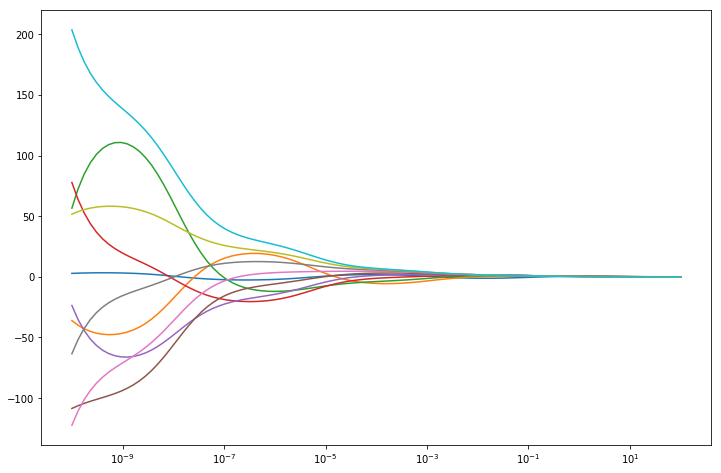

In [178]:
plt.figure(figsize=(12,8))
plt.plot(alphas,coefs)
# 设置坐标轴 不是一均匀的方式 来设置x轴线 而是 以10的倍数来设置
plt.xscale('log')
# 通过观察 岭际线 发现
# 大于10的-5次方 各个特征的权重就几乎为0了
# 小于10的-7次方 某些特征的权重的变化幅度就会非常大 很容易出问题
# 比较保守的猜测 我们在 10的-7次方 到 10的-5次方 之间 取一个alpha值比较合适

## 三、lasso回归

### 1、原理

对于参数w增加一个限定条件，能到达和岭回归类似的效果：

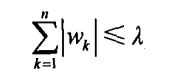

在lambda足够小的时候，一些系数会因此被迫缩减到0

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import Lasso

In [4]:
# lasso原理就是 去把一些权重小的系数归零 从而使各个w的和 小于 我们设定的 lambda的值
# 比如 5个5元一次方程组
w = np.array([1,2,3,4,5])
np.sum(w)
# 如果我要求lambda小于10 则可能只留下 5 和 4
# lasso中的参数alpha指的是留下的特征的比例 一般是0-1的小数 功能和上面说的lambda正好相反
# 接下来通过对比 观察三种回归的特点

15

## 四、普通线性回归、岭回归与lasso回归比较

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

In [70]:
# 人为捏造一些随机数据 让大家对比 三种 线性回归的特点
np.random.seed(10)
# samples样本有5个 features每个样本有5个特征
samples = 50  # 有几个样本就有几行
features = 100  # 有几个特征就有几列
X = np.random.randn(samples,features)
X  # 各个样本和他们的特征值

array([[ 1.3315865 ,  0.71527897, -1.54540029, ...,  0.08958761,
         0.82699862, -1.95451212],
       [ 0.11747566, -1.90745689, -0.92290926, ..., -1.02231069,
         1.16716837, -0.57197681],
       [ 0.1331375 ,  1.20274387, -1.02475297, ..., -0.14506454,
         0.16390425,  0.82951248],
       ...,
       [-0.16247064, -0.93696051,  0.01197721, ...,  0.13804811,
        -0.49562203, -0.21395526],
       [-0.67909404,  0.4258592 ,  1.53282739, ...,  1.40596106,
         1.60604064,  1.79581043],
       [-1.70055741, -1.42433608, -1.58493788, ..., -1.44255419,
         0.38838999,  0.70120839]])

In [71]:
# 捏造一些权重
# 权重 [w1,w2,..,w5]
# np.random.randn(5)
w = 10*np.random.randn(features)  # 有几个特征就有几个权重的值
w

array([  6.23249993,   0.50663519,   3.99716959, -22.14451948,
        15.37085202,  -0.0983003 ,  -6.84252311,   4.8456709 ,
        -5.01908025,  19.61089241,   0.60875638,  -5.27815355,
         0.14722233,  -0.06048438,  -0.47480728,  11.81457059,
       -33.93108614,  -0.98218367,  -4.51761178,  -3.85110119,
       -17.84776203,  -1.60701867,   0.25794018,   4.75745553,
        15.81186792, -11.69428765,  -7.59688675,  -6.68230305,
         1.40717662, -12.09566366,  14.38799223,   4.87903834,
        -4.82221546,   7.39603981,   4.56621002,  19.52062318,
       -20.89402361,  11.04912194,  10.63144257,  -5.58002443,
       -14.46227438,  -7.31396737,   4.28545292,  -0.53455032,
         1.82136234,   8.02717845,  -6.3602129 ,  -8.12661518,
         9.3224976 ,   3.87864392,  -4.22279989,   6.04001805,
        -7.61089862,   8.67843541,  -7.13968163, -20.74070164,
         4.02861785,   4.2806667 ,  17.92945289,   6.8365843 ,
         0.96690036,  -0.77087229,  -4.4537884 ,  14.83

In [72]:
# 把一些特征的权重 归零 （因为这个案例要凸显 lasso的效果 lasso就是可以把一些权重小的归零）
# 通过w的索引找到w中的一些值然后清零 （索引要打乱顺序）
# np.random.permutation(5)
index = np.random.permutation(features)  # 打乱的 各个权重的索引
index

array([70, 86, 30,  9, 43, 95, 41, 20, 29, 48, 55, 25, 46, 76, 99, 71, 38,
        8, 11, 10, 97, 34, 77, 67, 61,  4, 52, 62,  6, 60, 19, 82, 59, 91,
       56,  7, 35, 13, 81, 32, 93, 27, 42, 63, 54, 40, 51,  0, 16, 75, 74,
       79, 78, 22, 39, 28,  3, 96, 90,  5,  1, 45, 50, 68,  2, 33, 58, 15,
       98, 69, 65, 89, 88, 57, 31, 85, 87, 47, 80, 17, 64, 36, 94, 23, 24,
       18, 37, 66, 26, 92, 14, 83, 12, 84, 49, 73, 44, 72, 53, 21])

In [73]:
index[:90]  # 找出前四个索引

array([70, 86, 30,  9, 43, 95, 41, 20, 29, 48, 55, 25, 46, 76, 99, 71, 38,
        8, 11, 10, 97, 34, 77, 67, 61,  4, 52, 62,  6, 60, 19, 82, 59, 91,
       56,  7, 35, 13, 81, 32, 93, 27, 42, 63, 54, 40, 51,  0, 16, 75, 74,
       79, 78, 22, 39, 28,  3, 96, 90,  5,  1, 45, 50, 68,  2, 33, 58, 15,
       98, 69, 65, 89, 88, 57, 31, 85, 87, 47, 80, 17, 64, 36, 94, 23, 24,
       18, 37, 66, 26, 92])

In [74]:
w[index[:90]] = 0  # 把前四个打乱顺序的所对应的权重值 归零

In [75]:
w

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.14722233,  0.        , -0.47480728,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.60701867,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.82136234,
        0.        ,  0.        ,  0.        ,  0.        ,  3.87864392,
        0.        ,  0.        ,  0.        ,  8.67843541,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [76]:
X

array([[ 1.3315865 ,  0.71527897, -1.54540029, ...,  0.08958761,
         0.82699862, -1.95451212],
       [ 0.11747566, -1.90745689, -0.92290926, ..., -1.02231069,
         1.16716837, -0.57197681],
       [ 0.1331375 ,  1.20274387, -1.02475297, ..., -0.14506454,
         0.16390425,  0.82951248],
       ...,
       [-0.16247064, -0.93696051,  0.01197721, ...,  0.13804811,
        -0.49562203, -0.21395526],
       [-0.67909404,  0.4258592 ,  1.53282739, ...,  1.40596106,
         1.60604064,  1.79581043],
       [-1.70055741, -1.42433608, -1.58493788, ..., -1.44255419,
         0.38838999,  0.70120839]])

In [77]:
# 根据各个样本的 特征值 和 特征值的权重 求 各个样本的 目标值
# 各个样本的特征 X
# 各个特征的权重是 w
y = np.dot(X,w)
y

array([ 11.04911407,  23.82429263,  15.95022049, -13.06683203,
         1.83606889,   4.00445806, -10.8547909 , -19.85222348,
        13.95699997,  -6.54344154,  -1.0667119 ,  11.76776751,
        -6.2683397 ,  -0.89371665, -20.43478506, -18.23609568,
       -20.54643584,  -4.01663178,  -7.10741042, -11.52341295,
        -4.12552054,  -8.13566619,  10.7732734 ,  17.8514837 ,
        12.84087457,  -2.54641278, -15.92663619,   1.7031876 ,
       -12.70536442,  20.0898541 ,  -2.59194829, -17.50030057,
         3.46616665,  11.61103758,  -1.94137228,  16.40359492,
       -14.36969424,  -8.63512917,  -9.50175518,  -4.02269419,
         2.53993423, -11.2021099 , -26.52357047,  -1.0663698 ,
         3.15861265,   1.45333128,  19.32035283,  25.04388302,
       -14.97077497,  -4.39190407])

In [ ]:
# 数据构造好了 接下来 看看各个回归方式 预测的权重的效果

In [78]:
# 获取模型
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [85]:
lr = LinearRegression()
rr = Ridge(alpha=1,fit_intercept=False)
lasso = Lasso(alpha=0.8)  # 这里的alpha参数 和上面数学公式中的lambda类似 也是用来设置权重的上限的
# 只不过alpha的值一般是0-1的小数 *用来表示有用的特征的比例*

In [86]:
lr.fit(X,y)
rr.fit(X,y)
lasso.fit(X,y)

Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# 接下来 就是看 各个模型对coef的预测是否准确

训练数据和测试数据

分别使用线性回归，岭回归，Lasso回归进行数据预测

Text(0.5,1,'lasso')

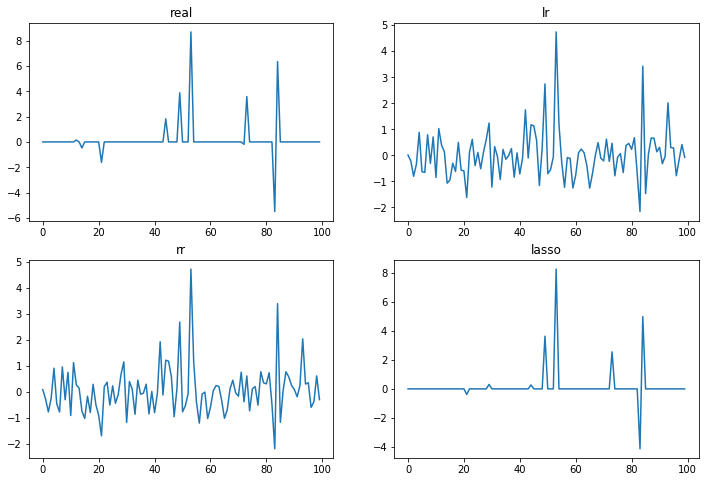

In [87]:
plt.figure(figsize=(12,8))
# 使用子画布 把 真实的real 普通线性回归lr 岭回归rr 拉索lasso回归 这四个都画出来 给大家看效果
axes1 = plt.subplot(2,2,1)  # 先绘制真实的权重
axes1.plot(w)
axes1.set_title('real')
# 普通线性回归
axes2 = plt.subplot(2,2,2)
axes2.plot(lr.coef_)
axes2.set_title('lr')
# 岭回归
axes3 = plt.subplot(2,2,3)
axes3.plot(rr.coef_)
axes3.set_title('rr')
# 拉索回归
axes4 = plt.subplot(2,2,4)
axes4.plot(lasso.coef_)
axes4.set_title('lasso')

数据视图，此处获取各个算法的训练数据的coef_:系数